In [1]:
# running all areas

import numpy as np
import pandas as pd
from sklearn.preprocessing import binarize, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
#from google.colab import drive
#drive.mount('/content/drive')

#load the data
data = pd.read_csv('covtype.csv')

#since fire point is our target we will binarize the feature with a threshold of 1600
data['Horizontal_Distance_To_Fire_Points'] = binarize(data.get('Horizontal_Distance_To_Fire_Points').to_frame(), threshold=1600)


scaler = MinMaxScaler()


X = data.drop(columns=['Horizontal_Distance_To_Fire_Points'])
Y = data['Horizontal_Distance_To_Fire_Points']
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test =  train_test_split(X,Y)

model =  LogisticRegression().fit(X_train, Y_train)
Y_predict = model.predict(X_test)

print(classification_report(Y_test, Y_predict))





              precision    recall  f1-score   support

           0       0.68      0.58      0.62     67052
           1       0.68      0.76      0.72     78201

    accuracy                           0.68    145253
   macro avg       0.68      0.67      0.67    145253
weighted avg       0.68      0.68      0.67    145253



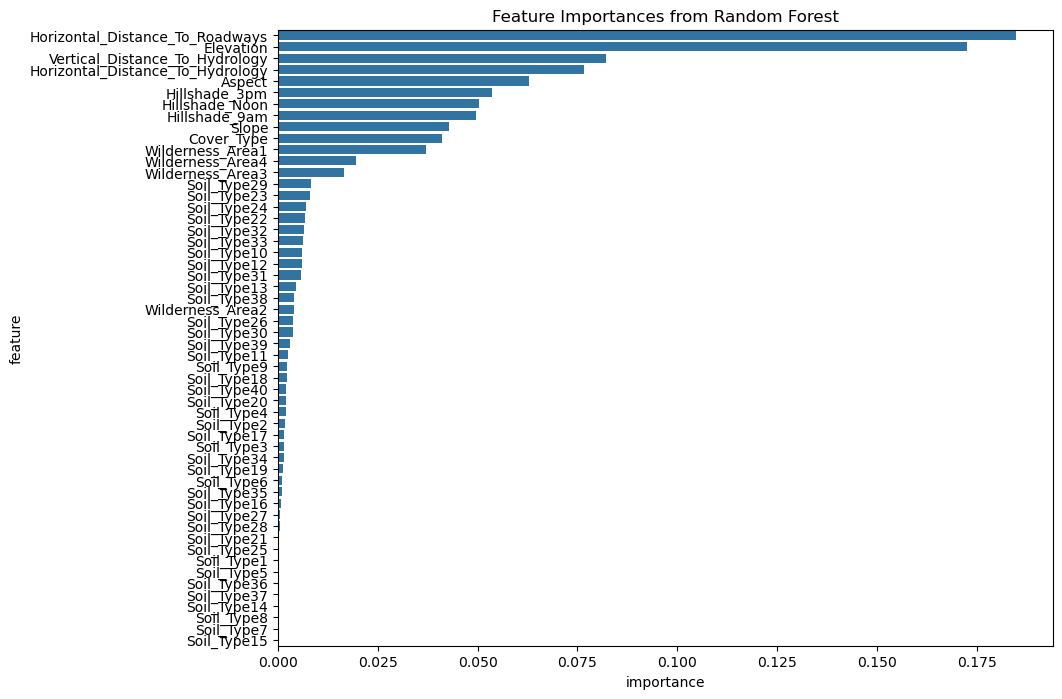

In [4]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
importances = rf.feature_importances_
feature_names = data.drop(columns=['Horizontal_Distance_To_Fire_Points']).columns

# Create a DataFrame for visualization
fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
fi_df = fi_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=fi_df)
plt.title('Feature Importances from Random Forest')
plt.show()


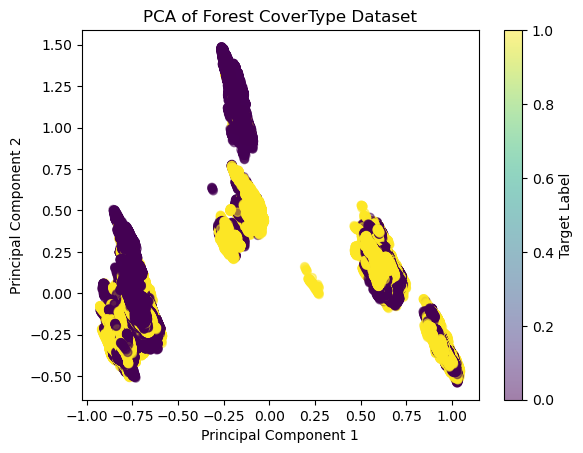

In [5]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)  # X is your scaled feature matrix
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Forest CoverType Dataset')
plt.colorbar(label='Target Label')
plt.show()


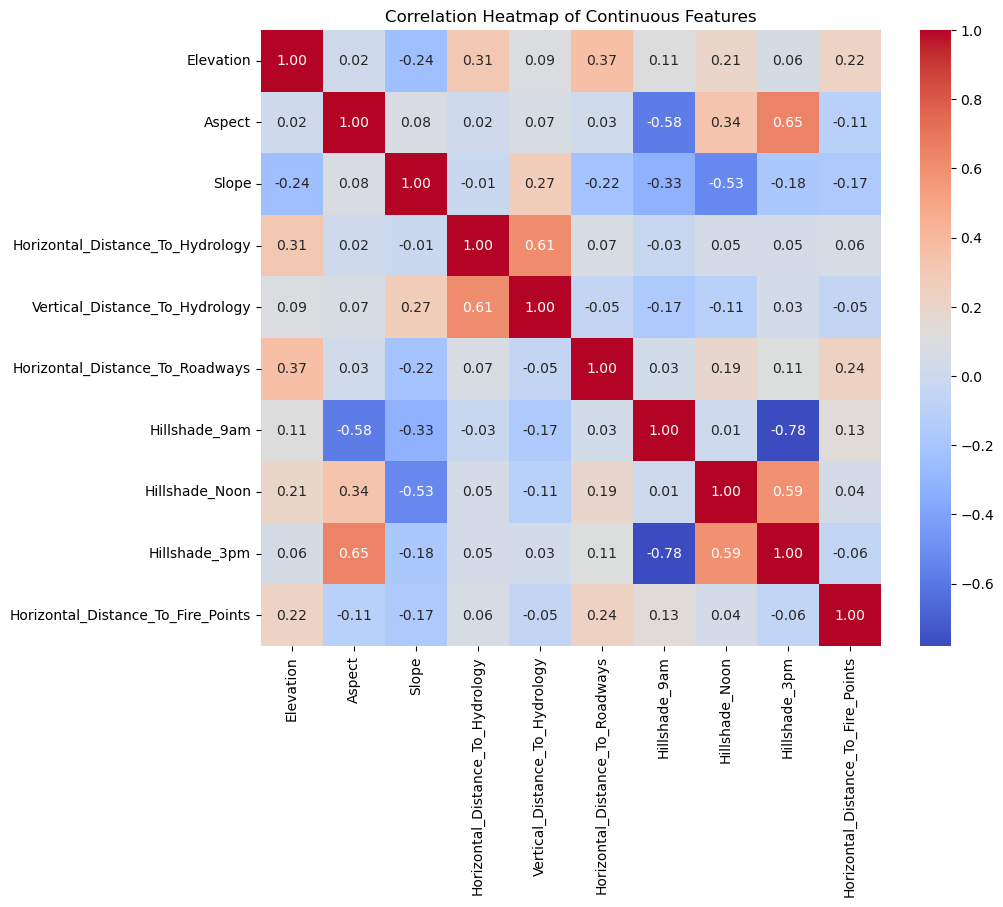

In [6]:
continuous_features = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
    'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]

corr_cont = data[continuous_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_cont, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Continuous Features")
plt.show()

## Dropping all soil features

In [7]:
# we find all features with soil name
soil_cols = [col for col in data.columns if col.startswith("Soil_Type")]

# drop
data_no_soil = data.drop(columns=soil_cols)

scaler = MinMaxScaler()

X = data_no_soil.drop(columns=['Horizontal_Distance_To_Fire_Points'])
Y = data_no_soil['Horizontal_Distance_To_Fire_Points']
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test =  train_test_split(X,Y)

model =  LogisticRegression().fit(X_train, Y_train)
Y_predict = model.predict(X_test)

print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.65      0.58      0.62     67303
           1       0.67      0.73      0.70     77950

    accuracy                           0.66    145253
   macro avg       0.66      0.66      0.66    145253
weighted avg       0.66      0.66      0.66    145253

